In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2025.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2025_00000001,2025-01-08,CUST_2025_00005600,PROD_000627,Oppo F11 Pro 128GB Black,Electronics,Smartphones,Oppo,10234.12,0.00,10234.12,2,20468.24,0.0,20468.24,Delhi,Delhi,Metro,Budget,NaN,UPI,3,Standard,False,False,NaN,4.5,Delivered,1,2025,1,0.15,True,4.4
1,TXN_2025_00000002,01/15/2025,CUST_2022_00027099,PROD_001699,Samsung Slate 4GB RAM Silver,Electronics,Tablets,Samsung,38241.08,0.00,38241.08,1,38241.08,NaN,38241.08,Hyderabad,Telangana,Metro,Premium,18-25,UPI,2,Express,True,False,NaN,NaN,Returned,1,2025,1,0.64,TRUE,3.4
2,TXN_2025_00000003,2025-01-26,CUST_2021_00027917,PROD_001242,Apple iPhone 16 Plus 64GB Black,Electronics,Smartphones,Apple,121974.26,32.04,82895.16,1,82895.16,0.0,82895.16,Bangalore,Karnataka,Metro,Premium,26-35,UPI,2,Express,True,True,Republic Day Sale,NaN,Returned,1,2025,1,0.18,True,3.4
3,TXN_2025_00000004,2025-01-04,CUST_2025_00004184,PROD_000979,Samsung Galaxy S22+ 128GB White,Electronics,Smartphones,Samsung,59075.7,0.00,59075.70,1,59075.70,0.0,59075.70,Chandigarh,Punjab,Tier2,Standard,46-55,Credit Card,2,Express,True,False,NaN,3.5,Delivered,1,2025,1,0.24,False,3.3
4,TXN_2025_00000005,2025-01-03,CUST_2025_00005205,PROD_001876,Apple Watch Premium,Electronics,Smart Watch,Apple,74269.31,0.00,74269.31,1,74269.31,0.0,74269.31,Kolkata,West Bengal,Metro,Premium,18-25,Credit Card,1,Same Day,True,False,NaN,5.0/5.0,Returned,1,2025,1,0.05,TRUE,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77380,TXN_2025_00019019_DUP,2025-04-07,CUST_2022_00004500,PROD_000136,Samsung Galaxy S7 Edge 16GB Blue,Electronics,Smartphones,Samsung,67658.04,0.00,67658.04,1,67658.04,0.0,67658.04,Kolkata,West Bengal,Metro,Premium,55+,UPI,1,Same Day,True,False,NaN,3.5,Delivered,4,2025,2,0.16,True,3.4
77381,TXN_2025_00053859_DUP,09-10-2025,CUST_2025_00013666,PROD_000527,Samsung Galaxy A50 64GB White,Electronics,Smartphones,Samsung,19905.88,24.29,15071.22,3,45213.67,0.0,45213.67,Delhi,Delhi,Metro,Standard,26-35,Debit Card,1,Same Day,True,False,NaN,3.5 stars,Delivered,10,2025,4,0.20,False,4.2
77382,TXN_2025_00030006_DUP,2025-06-29,CUST_2025_00011941,PROD_000839,Samsung Galaxy Note 21 256GB White,Electronics,Smartphones,Samsung,75655.18,30.26,52759.01,1,52759.01,NaN,52759.01,Ahmedabad,Gujarat,Tier1,Standard,36-45,UPI,3,Standard,True,True,Back to School,4.0,Delivered,6,2025,2,0.22,True,4.1
77383,TXN_2025_00066716_DUP,2025-11-21,CUST_2025_00000199,PROD_001581,ASUS Gaming 4GB RAM Black,Electronics,Laptops,ASUS,125461.24,0.00,125461.24,3,376383.72,0.0,376383.72,Delhi,Delhi,Metro,Premium,46-55,UPI,5,Standard,False,False,NaN,4.5,Delivered,11,2025,4,2.57,False,3.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77385 entries, 0 to 77384
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          77385 non-null  object 
 1   order_date              77385 non-null  object 
 2   customer_id             77385 non-null  object 
 3   product_id              77385 non-null  object 
 4   product_name            77385 non-null  object 
 5   category                77385 non-null  object 
 6   subcategory             77385 non-null  object 
 7   brand                   77385 non-null  object 
 8   original_price_inr      77385 non-null  object 
 9   discount_percent        77385 non-null  float64
 10  discounted_price_inr    77385 non-null  float64
 11  quantity                77385 non-null  int64  
 12  subtotal_inr            77385 non-null  float64
 13  delivery_charges        71189 non-null  float64
 14  final_amount_inr        77385 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2025-01-08
1,01/15/2025
2,2025-01-26
3,2025-01-04
4,2025-01-03
...,...
77380,2025-04-07
77381,09-10-2025
77382,2025-06-29
77383,2025-11-21


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2025-01-08 00:00:00
1,01/15/2025
2,2025-01-26 00:00:00
3,2025-01-04 00:00:00
4,2025-01-03 00:00:00
...,...
77380,2025-04-07 00:00:00
77381,09-10-2025
77382,2025-06-29 00:00:00
77383,2025-11-21 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2025-01-08
1,NaT
2,2025-01-26
3,2025-01-04
4,2025-01-03
...,...
77380,2025-04-07
77381,NaT
77382,2025-06-29
77383,2025-11-21


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,10234.12
1,38241.08
2,121974.26
3,59075.70
4,74269.31
...,...
77380,67658.04
77381,19905.88
77382,75655.18
77383,125461.24


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4.5', nan, '3.5', '5.0/5.0', '5.0', '3.0', '4.0', '4.0 stars',
       '3/5', '4.0/5.0', '3.5/5.0', '4.5 stars', '4.5/5.0', '4/5',
       '5.0 stars', '5/5', '3.5 stars', '3.0/5.0', '3', '5', '4',
       '3.0 stars'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(23464)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.5
1,NaN
2,NaN
3,3.5
4,5.0
...,...
77380,3.5
77381,3.5
77382,4.0
77383,4.5


In [15]:
df['customer_rating'].isnull().sum()

np.int64(23464)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.305743587841472)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Delhi', 'Hyderabad', 'Bangalore', 'Chandigarh', 'Kolkata', 'Pune',
       'Ahmedabad', 'Bhubaneswar', 'Chennai', 'Surat', 'Vadodara',
       'Nagpur', 'Ludhiana', 'Visakhapatnam', 'Indore', 'Jaipur',
       'Kanpur', 'Bareilly', 'Aligarh', 'Mumbai', 'Coimbatore', 'Patna',
       'Moradabad', 'BANGALORE', 'Gorakhpur', 'Lucknow', 'Saharanpur',
       'Kochi', 'Allahabad', 'Varanasi', 'Meerut', 'DELHI', 'Banglore',
       'Madras', 'Calcutta', 'Chennai ', 'chenai', 'mumba', 'kolkata',
       'New Delhi', 'Delhi NCR', 'Mumbai ', 'CHENNAI', 'Bombay', 'MUMBAI',
       'delhi', 'Bengaluru', 'KOLKATA', 'Bengalore', 'Kolkata '],
      dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Delhi', 'Hyderabad', 'Bengaluru', 'Chandigarh', 'Kolkata', 'Pune',
       'Ahmedabad', 'Bhubaneswar', 'Chennai', 'Surat', 'Vadodara',
       'Nagpur', 'Ludhiana', 'Visakhapatnam', 'Indore', 'Jaipur',
       'Kanpur', 'Bareilly', 'Aligarh', 'Mumbai', 'Coimbatore', 'Patna',
       'Moradabad', 'Gorakhpur', 'Lucknow', 'Saharanpur', 'Kochi',
       'Allahabad', 'Varanasi', 'Meerut'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Delhi', 'Hyderabad', 'Bengaluru', 'Chandigarh', 'Kolkata', 'Pune',
       'Ahmedabad', 'Bhubaneswar', 'Chennai', 'Surat', 'Vadodara',
       'Nagpur', 'Ludhiana', 'Visakhapatnam', 'Indore', 'Jaipur',
       'Kanpur', 'Bareilly', 'Aligarh', 'Mumbai', 'Coimbatore', 'Patna',
       'Moradabad', 'Gorakhpur', 'Lucknow', 'Saharanpur', 'Kochi',
       'Allahabad', 'Varanasi', 'Meerut'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['False', 'True', '1', 'TRUE', 'No', 'FALSE', '0', 'Yes'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['True', 'TRUE', 'False', '1', 'Yes', '0', 'FALSE', 'No'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', 'FALSE', 'No', '0', 'TRUE', 'Yes', '1'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[ True False]
[False  True]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'ELECTRONICS', 'Electronicss',
       'Electronics & Accessories', 'Electronic'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['3', '2', '1', '5', '6', '4', '0', '-1', '1-2 days', '7',
       'Same Day', 'Express', '15'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
65988,2
51770,1
2234,2
56553,2
9836,1
41913,1
66643,1
18078,2
12601,1
65081,2


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 3.,  2.,  1.,  5.,  6.,  4.,  0.,  7., nan, 15.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(151)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,3
1,2
2,2
3,2
4,1


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
480,TXN_2025_00000481,2025-01-19,CUST_2025_00008852,PROD_000271,OnePlus OnePlus 5T 32GB Black,Electronics,Smartphones,OnePlus,25617.50,0.00,25617.50,2,51235.00,0.0,51235.00,Delhi,Delhi,Metro,Standard,36-45,UPI,6,Standard,False,False,NaN,4.500000,Delivered,1,2025,1,0.18,False,4.1
657,TXN_2025_00000658,2025-01-02,CUST_2023_00004475,PROD_001056,Nothing Phone (1) 256GB Black,Electronics,Smartphones,Nothing,36543.46,0.00,36543.46,1,36543.46,0.0,36543.46,Nagpur,Maharashtra,Tier1,Standard,55+,UPI,3,Standard,False,False,NaN,3.000000,Delivered,1,2025,1,0.15,True,4.3
723,TXN_2025_00000724,2025-01-28,CUST_2025_00014658,PROD_000751,Realme Realme Narzo 10 64GB Black,Electronics,Smartphones,Realme,28240.47,0.00,28240.47,1,28240.47,0.0,28240.47,Mumbai,Maharashtra,Metro,Standard,36-45,Wallet,1,Same Day,True,False,NaN,4.305744,Delivered,1,2025,1,0.19,False,4.3
787,TXN_2025_00000788,2025-01-25,CUST_2024_00019334,PROD_001986,Samsung QLED TV,Electronics,TV & Entertainment,Samsung,25453.30,54.27,11639.91,1,11639.91,0.0,11639.91,Ahmedabad,Gujarat,Tier1,Budget,36-45,UPI,3,Standard,True,True,Republic Day Sale,4.000000,Delivered,1,2025,1,44.26,True,3.7
1125,TXN_2025_00001126,2025-01-18,CUST_2019_00002863,PROD_001149,Xiaomi Mi 13 256GB Black,Electronics,Smartphones,Xiaomi,21450.82,0.00,21450.82,1,21450.82,0.0,21450.82,Bengaluru,Karnataka,Metro,Standard,26-35,COD,4,Standard,False,False,NaN,5.000000,Delivered,1,2025,1,0.17,True,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77380,TXN_2025_00019019_DUP,2025-04-07,CUST_2022_00004500,PROD_000136,Samsung Galaxy S7 Edge 16GB Blue,Electronics,Smartphones,Samsung,67658.04,0.00,67658.04,1,67658.04,0.0,67658.04,Kolkata,West Bengal,Metro,Premium,55+,UPI,1,Same Day,True,False,NaN,3.500000,Delivered,4,2025,2,0.16,True,3.4
77381,TXN_2025_00053859_DUP,NaT,CUST_2025_00013666,PROD_000527,Samsung Galaxy A50 64GB White,Electronics,Smartphones,Samsung,19905.88,24.29,15071.22,3,45213.67,0.0,45213.67,Delhi,Delhi,Metro,Standard,26-35,Debit Card,1,Same Day,True,False,NaN,3.500000,Delivered,10,2025,4,0.20,False,4.2
77382,TXN_2025_00030006_DUP,2025-06-29,CUST_2025_00011941,PROD_000839,Samsung Galaxy Note 21 256GB White,Electronics,Smartphones,Samsung,75655.18,30.26,52759.01,1,52759.01,NaN,52759.01,Ahmedabad,Gujarat,Tier1,Standard,36-45,UPI,3,Standard,True,True,Back to School,4.000000,Delivered,6,2025,2,0.22,True,4.1
77383,TXN_2025_00066716_DUP,2025-11-21,CUST_2025_00000199,PROD_001581,ASUS Gaming 4GB RAM Black,Electronics,Laptops,ASUS,125461.24,0.00,125461.24,3,376383.72,0.0,376383.72,Delhi,Delhi,Metro,Premium,46-55,UPI,5,Standard,False,False,NaN,4.500000,Delivered,11,2025,4,2.57,False,3.0


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Oppo F11 Pro 128GB Black,10234.12
1,Samsung Slate 4GB RAM Silver,38241.08
2,Apple iPhone 16 Plus 64GB Black,121974.26
3,Samsung Galaxy S22+ 128GB White,59075.70
4,Apple Watch Premium,74269.31
...,...,...
76995,OnePlus OnePlus 5 16GB Black,27337.72
76996,OnePlus OnePlus Nord 64GB Black,28130.95
76997,Realme Realme 13 128GB Blue,26769.50
76998,Realme iPad 4GB RAM Silver,133854.95


In [46]:
df['original_price_inr']

,original_price_inr
0,10234.12
1,38241.08
2,121974.26
3,59075.70
4,74269.31
...,...
76995,27337.72
76996,28130.95
76997,26769.50
76998,133854.95


<Axes: >

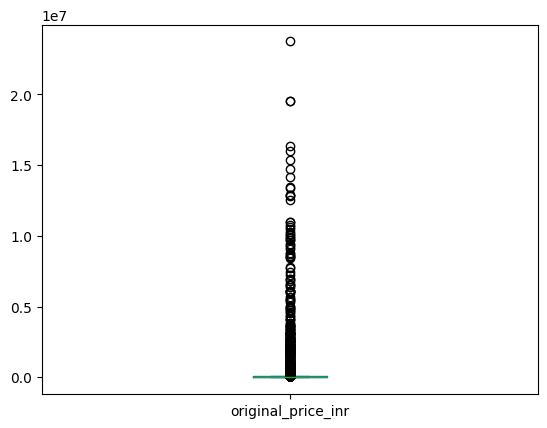

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,7.700000e+04
mean,6.047552e+04
std,3.121155e+05
min,1.067270e+03
25%,2.144385e+04
50%,3.188098e+04
75%,6.378800e+04
max,2.375135e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(63788.0), np.float64(21443.85))

In [50]:
IQR=Q3-Q1
IQR

np.float64(42344.15)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-42072.37500000001), np.float64(127304.225))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
6,TXN_2025_00000007,2025-01-09,CUST_2022_00012830,PROD_001265,Samsung Galaxy S24+ 64GB Gold,Electronics,Smartphones,Samsung,128154.25,0.00,128154.25,1,128154.25,0.0,128154.25,Pune,Maharashtra,Tier1,Premium,18-25,UPI,1,Same Day,True,False,NaN,4.305744,Delivered,1,2025,1,0.25,True,4.4
21,TXN_2025_00000022,2025-01-10,CUST_2025_00004100,PROD_001555,Lenovo Pavilion 4GB RAM Silver,Electronics,Laptops,Lenovo,164649.47,0.00,164649.47,1,164649.47,0.0,164649.47,Surat,Gujarat,Tier1,Premium,46-55,COD,6,Standard,False,False,NaN,4.305744,Delivered,1,2025,1,2.80,True,4.3
25,TXN_2025_00000026,2025-01-01,CUST_2022_00038506,PROD_000496,Apple iPhone 11 Pro Max 64GB Black,Electronics,Smartphones,Apple,159640.59,0.00,159640.59,1,159640.59,NaN,159640.59,Delhi,Delhi,Metro,Premium,NaN,BNPL,1,Same Day,True,False,NaN,4.305744,Delivered,1,2025,1,0.18,False,3.6
42,TXN_2025_00000043,2025-01-29,CUST_2018_00022467,PROD_001693,Samsung Galaxy Tab 8GB RAM Black,Electronics,Tablets,Samsung,187569.00,9.04,170606.16,3,511818.48,0.0,511818.48,Ahmedabad,Gujarat,Tier1,Premium,18-25,UPI,2,Express,True,False,NaN,5.000000,Delivered,1,2025,1,0.45,True,3.7
46,TXN_2025_00000047,2025-01-25,CUST_2022_00005631,PROD_000821,Apple iPhone 13 mini 256GB Blue,Electronics,Smartphones,Apple,154382.34,65.57,53146.43,1,53146.43,0.0,53146.43,Bengaluru,Karnataka,Metro,Premium,36-45,UPI,1,Same Day,True,True,Republic Day Sale,4.500000,Delivered,1,2025,1,0.25,False,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76953,TXN_2025_00076954,2025-12-22,CUST_2025_00018757,PROD_000232,Apple iPhone X 16GB White,Electronics,Smartphones,Apple,138119.12,14.56,118013.72,2,236027.44,0.0,236027.44,Delhi,Delhi,Metro,Premium,18-25,UPI,1,Same Day,True,False,NaN,4.305744,Delivered,12,2025,4,0.20,False,3.3
76970,TXN_2025_00076971,2025-12-15,CUST_2025_00023655,PROD_000281,Xiaomi Mi A1 16GB Black,Electronics,Smartphones,Xiaomi,2547817.00,21.56,19985.48,1,19985.48,0.0,19985.48,Coimbatore,Tamil Nadu,Tier2,Standard,36-45,UPI,2,Express,True,False,NaN,4.305744,Delivered,12,2025,4,0.20,True,4.4
76977,TXN_2025_00076978,2025-12-26,CUST_2025_00022780,PROD_000344,Apple iPhone XS 64GB White,Electronics,Smartphones,Apple,134963.11,0.00,134963.11,2,269926.22,0.0,269926.22,Kolkata,West Bengal,Metro,Premium,46-55,Wallet,3,Standard,False,False,NaN,4.500000,Delivered,12,2025,4,0.18,True,4.1
76984,TXN_2025_00076985,2025-12-24,CUST_2025_00017562,PROD_001608,Apple ThinkPad 4GB RAM Black,Electronics,Laptops,Apple,195897.62,17.27,162059.31,1,162059.31,0.0,162059.31,Chennai,Tamil Nadu,Metro,Premium,NaN,Credit Card,2,Express,True,False,NaN,3.000000,Cancelled,12,2025,4,1.70,True,4.5


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2025_00000001,2025-01-08,CUST_2025_00005600,PROD_000627,Oppo F11 Pro 128GB Black,Electronics,Smartphones,Oppo,10234.12,0.00,10234.12,2,20468.24,0.0,20468.24,Delhi,Delhi,Metro,Budget,NaN,UPI,3,Standard,False,False,NaN,4.500000,Delivered,1,2025,1,0.15,True,4.4
1,TXN_2025_00000002,NaT,CUST_2022_00027099,PROD_001699,Samsung Slate 4GB RAM Silver,Electronics,Tablets,Samsung,38241.08,0.00,38241.08,1,38241.08,NaN,38241.08,Hyderabad,Telangana,Metro,Premium,18-25,UPI,2,Express,True,False,NaN,4.305744,Returned,1,2025,1,0.64,True,3.4
2,TXN_2025_00000003,2025-01-26,CUST_2021_00027917,PROD_001242,Apple iPhone 16 Plus 64GB Black,Electronics,Smartphones,Apple,121974.26,32.04,82895.16,1,82895.16,0.0,82895.16,Bengaluru,Karnataka,Metro,Premium,26-35,UPI,2,Express,True,True,Republic Day Sale,4.305744,Returned,1,2025,1,0.18,True,3.4
3,TXN_2025_00000004,2025-01-04,CUST_2025_00004184,PROD_000979,Samsung Galaxy S22+ 128GB White,Electronics,Smartphones,Samsung,59075.70,0.00,59075.70,1,59075.70,0.0,59075.70,Chandigarh,Punjab,Tier2,Standard,46-55,Credit Card,2,Express,True,False,NaN,3.500000,Delivered,1,2025,1,0.24,False,3.3
4,TXN_2025_00000005,2025-01-03,CUST_2025_00005205,PROD_001876,Apple Watch Premium,Electronics,Smart Watch,Apple,74269.31,0.00,74269.31,1,74269.31,0.0,74269.31,Kolkata,West Bengal,Metro,Premium,18-25,Credit Card,1,Same Day,True,False,NaN,5.000000,Returned,1,2025,1,0.05,True,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76994,TXN_2025_00076995,NaT,CUST_2022_00044727,PROD_000941,Oppo Reno 6 128GB Black,Electronics,Smartphones,Oppo,28360.06,10.83,25289.92,1,25289.92,0.0,25289.92,Kochi,Kerala,Tier2,Standard,36-45,COD,2,Express,True,False,NaN,4.500000,Delivered,12,2025,4,0.18,True,3.5
76995,TXN_2025_00076996,2025-12-01,CUST_2025_00020497,PROD_000262,OnePlus OnePlus 5 16GB Black,Electronics,Smartphones,OnePlus,27337.72,17.49,22557.68,1,22557.68,0.0,22557.68,Kolkata,West Bengal,Metro,Standard,36-45,UPI,1,Same Day,True,False,NaN,4.000000,Delivered,12,2025,4,0.20,True,4.6
76996,TXN_2025_00076997,2025-12-08,CUST_2025_00014393,PROD_000710,OnePlus OnePlus Nord 64GB Black,Electronics,Smartphones,OnePlus,28130.95,23.04,21650.47,1,21650.47,0.0,21650.47,Kochi,Kerala,Tier2,Standard,46-55,COD,3,Standard,True,False,NaN,4.305744,Delivered,12,2025,4,0.19,True,4.2
76997,TXN_2025_00076998,2025-12-31,CUST_2021_00023963,PROD_001476,Realme Realme 13 128GB Blue,Electronics,Smartphones,Realme,26769.50,0.00,26769.50,1,26769.50,0.0,26769.50,Bhubaneswar,Odisha,Tier2,Standard,46-55,UPI,4,Standard,False,False,NaN,5.000000,Delivered,12,2025,4,0.21,True,3.5


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['UPI', 'Credit Card', 'BNPL', 'COD', 'Debit Card', 'Net Banking',
       'Wallet'], dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['UPI', 'Card', 'BNPL', 'Cash', 'Online Banking', 'Wallet'],
      dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,6974
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
68881,0.0
14411,0.0
23354,NaN
30619,0.0
9623,0.0
15890,0.0
766,0.0
27473,0.0
68448,0.0
44317,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(5840)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array([nan, '18-25', '26-35', '46-55', '36-45', '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array([nan, 'Group-1', 'Group-2', 'Group-4', 'Group-3', 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,6974
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,6974
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73046 entries, 0 to 76999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          73046 non-null  object        
 1   order_date              66072 non-null  datetime64[ns]
 2   customer_id             73046 non-null  object        
 3   product_id              73046 non-null  object        
 4   product_name            73046 non-null  object        
 5   category                73046 non-null  object        
 6   subcategory             73046 non-null  object        
 7   brand                   73046 non-null  object        
 8   original_price_inr      73046 non-null  float64       
 9   discount_percent        73046 non-null  float64       
 10  discounted_price_inr    73046 non-null  float64       
 11  quantity                73046 non-null  int64         
 12  subtotal_inr            73046 non-null  float64    

In [72]:
df.to_csv('cleaned_2025.csv')